In [49]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import graphviz
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [10]:
url = 'https://raw.githubusercontent.com/malle72/finalproject/master/la_loans.csv'

In [ ]:
loans_df = pd.read_csv(url)

In [12]:
loans_df.head()

,app_accepted,respondent_id,agency_name,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loan_amount_000s,preapproval_name,...,applicant_income_000s,purchaser_type_name,hoepa_status_name,lien_status_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,1,463735,Consumer Financial Protection Bureau,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Owner-occupied as a principal dwelling,424,Not applicable,...,212.0,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,8060.0,6.440000,63300.0,179.789993,2432.0,3051.0
1,1,13951,Federal Deposit Insurance Corporation,FDIC,Conventional,One-to-four family dwelling (other than manufa...,Home purchase,Not owner-occupied as a principal dwelling,58,Not applicable,...,125.0,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,3412.0,26.290001,53700.0,88.519997,541.0,1856.0
2,1,75-2921540,Department of Housing and Urban Development,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,87,Not applicable,...,NaN,Freddie Mac (FHLMC),Not a HOEPA loan,Secured by a first lien,11628.0,16.139999,68100.0,169.660004,3549.0,4049.0
3,0,233031,Consumer Financial Protection Bureau,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,80,Not applicable,...,160.0,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a first lien,3412.0,26.290001,53700.0,88.519997,541.0,1856.0
4,0,233031,Consumer Financial Protection Bureau,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Not owner-occupied as a principal dwelling,64,Not applicable,...,73.0,Loan was not originated or was not sold in cal...,Not a HOEPA loan,Secured by a subordinate lien,2667.0,66.970001,53700.0,65.779999,209.0,1081.0


In [13]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148996 entries, 0 to 148995
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   app_accepted                    148996 non-null  int64  
 1   respondent_id                   148996 non-null  object 
 2   agency_name                     148996 non-null  object 
 3   agency_abbr                     148996 non-null  object 
 4   loan_type_name                  148996 non-null  object 
 5   property_type_name              148996 non-null  object 
 6   loan_purpose_name               148996 non-null  object 
 7   owner_occupancy_name            148996 non-null  object 
 8   loan_amount_000s                148996 non-null  int64  
 9   preapproval_name                148996 non-null  object 
 10  applicant_ethnicity_name        148996 non-null  object 
 11  co_applicant_ethnicity_name     148996 non-null  object 
 12  applicant_race_n

In [14]:
loans_df.describe()

,app_accepted,loan_amount_000s,applicant_sex,applicant_income_000s,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
count,148996.000000,148996.000000,148996.000000,135141.000000,145715.000000,145715.000000,145715.000000,145715.000000,145715.000000,145715.000000
mean,0.559230,164.155742,1.523229,90.640857,5790.106701,33.987342,59589.701815,112.088414,1562.809525,2202.367615
std,0.496481,374.476442,0.765829,502.567417,2860.910917,24.677483,6779.225197,39.329715,897.877141,1010.090677
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,47200.000000,0.000000,0.000000,0.000000
25%,0.000000,75.000000,1.000000,43.000000,3689.000000,15.470000,53700.000000,84.019997,936.000000,1480.000000
50%,1.000000,134.000000,1.000000,65.000000,5293.000000,26.639999,61600.000000,108.879997,1416.000000,2084.000000
75%,1.000000,203.000000,2.000000,102.000000,7323.000000,47.400002,63300.000000,134.199997,2014.000000,2721.000000
max,1.000000,43448.000000,4.000000,147417.000000,16628.000000,100.000000,68100.000000,333.570007,4838.000000,5690.000000


In [15]:
#loops through all the census numeric columns to replace NaN or missing values
for col in loans_df.columns[23:29]:
    no_na = loans_df[col].dropna() #an intermediary variable so that the median function can be called and used to replace missing values
    loans_df[col].fillna(np.median(no_na),inplace=True)

In [16]:
#loops through the secondary race fields and enters 'Not applicable' where the loan applicant didn't provide a second race
for col in loans_df.columns[13:16]:
    loans_df[col].fillna('Not applicable',inplace=True)

In [17]:
# replaces empty values in applicant_income_000s
loans_df['applicant_income_000s'].fillna(value=np.median(loans_df.applicant_income_000s.dropna()),inplace=True)

In [18]:
# dropping respondent_id; it is unneeded.
loans_df.drop('respondent_id',axis=1,inplace=True)

In [19]:
# dropping agency_name; duplicative
loans_df.drop('agency_name',axis=1,inplace=True)

In [20]:
# puts names of all object variables into a list
obj_list = []
for col in loans_df.columns:
    if loans_df[col].dtypes=='object':
        obj_list.append(col)

In [21]:
# uses obj_list to get dummy vars
loans_df = pd.get_dummies(loans_df,columns=obj_list,drop_first=True)

In [22]:
# code to split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(loans_df[loans_df.columns[1:]],loans_df.app_accepted,test_size=0.2,random_state=9,stratify=loans_df.app_accepted)

In [23]:
# initializing and fitting decision tree
clf = tree.DecisionTreeClassifier(max_depth=9)
clf = clf.fit(X=x_train.values,y=y_train.values)

In [24]:
# scoring training data
clf.score(x_train,y_train)

0.8790060069129837

In [25]:
# scoring testing data
clf.score(x_test,y_test)

0.8773489932885906

In [26]:
# checking for validation
abs(clf.score(x_train,y_train) - clf.score(x_test,y_test)) < 0.03

True

In [22]:
# returns naive rule
83323/(83323+65673)

0.5592297779806169

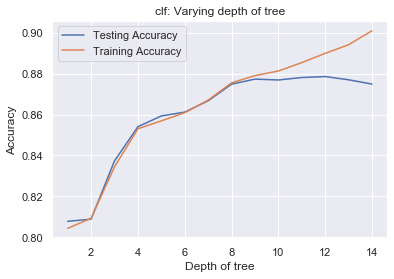

In [23]:
# checks various depths of decision tree model

dep = np.arange(1, 15)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

for i,k in enumerate(dep):
    clf2 = tree.DecisionTreeClassifier(max_depth=k)
    
    clf2.fit(x_train,y_train)
    
    train_accuracy[i] = clf2.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf2.score(x_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [75]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15,bootstrap=True)
rf_model.fit(x_train.values,y_train.values)

KeyboardInterrupt: 

In [68]:
rf_model.score(x_train.values,y_train.values)

0.7635975749487633

In [46]:
y_pred = rf_model.predict(x_test.values)

In [69]:
rf_model.score(x_test.values,y_test.values)

0.6753793037465806

In [47]:
mean_squared_error(y_test,y_pred)

0.08320554993281158

In [48]:
r2_score(y_test,y_pred)

0.662441204627502

In [63]:
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(None)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


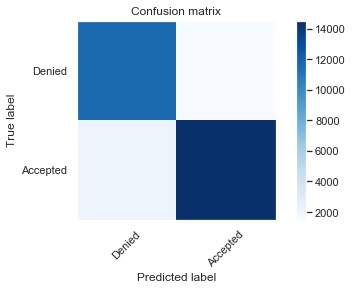

In [65]:
y_pred_dt = clf.predict(x_test)
cm=metrics.confusion_matrix(y_test,y_pred_dt)

plot_confusion_matrix(cm,classes=['Denied','Accepted'])

In [76]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148996 entries, 0 to 148995
Data columns (total 75 columns):
 #   Column                                                                                                         Non-Null Count   Dtype  
---  ------                                                                                                         --------------   -----  
 0   app_accepted                                                                                                   148996 non-null  int64  
 1   loan_amount_000s                                                                                               148996 non-null  int64  
 2   applicant_sex                                                                                                  148996 non-null  int64  
 3   applicant_income_000s                                                                                          148996 non-null  float64
 4   population                            